In [46]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use('dark_background')

In [47]:
# Hyper-Parameters Setting
input_size = 1 # 1차원
output_size = 1 # 1차원
num_epochs = 100
learning_rate = 0.001

In [48]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [49]:
model = nn.Linear(input_size, output_size)

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [50]:
# Training Model
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    # Forward
    pred = model(inputs)
    loss = loss_function(pred, targets)
    # BackPropagation
    optimizer.zero_grad()  # optimizer 초기화 
    loss.backward()
    optimizer.step()
    
    if epoch % 5 ==0:
        print(f'EPOCH: [{epoch}/{num_epochs}], Loss: {loss}')

EPOCH: [0/100], Loss: 2.296123504638672
EPOCH: [5/100], Loss: 1.0400314331054688
EPOCH: [10/100], Loss: 0.5311442017555237
EPOCH: [15/100], Loss: 0.32496190071105957
EPOCH: [20/100], Loss: 0.24141019582748413
EPOCH: [25/100], Loss: 0.20753823220729828
EPOCH: [30/100], Loss: 0.19379247725009918
EPOCH: [35/100], Loss: 0.18820010125637054
EPOCH: [40/100], Loss: 0.18591095507144928
EPOCH: [45/100], Loss: 0.1849600225687027
EPOCH: [50/100], Loss: 0.18455129861831665
EPOCH: [55/100], Loss: 0.18436230719089508
EPOCH: [60/100], Loss: 0.18426232039928436
EPOCH: [65/100], Loss: 0.1841985136270523
EPOCH: [70/100], Loss: 0.184149369597435
EPOCH: [75/100], Loss: 0.18410632014274597
EPOCH: [80/100], Loss: 0.18406574428081512
EPOCH: [85/100], Loss: 0.18402618169784546
EPOCH: [90/100], Loss: 0.18398718535900116
EPOCH: [95/100], Loss: 0.18394839763641357


### Visualization

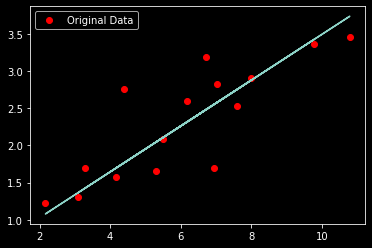

In [59]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()  # 분리시키고 넘파이로 바꿈
plt.plot(x_train, y_train, 'ro', label='Original Data')
plt.plot(x_train, predicted)

plt.legend()
plt.show()

# Save the Model Value 
torch.save(model.state_dict(),'model.ckpt')